In [1]:
# bostonhousing.csv 데이터 이용하여 w, b값을 구하고 
# 0.00632	18	2.31	0	0.538	6.575	65.2	4.09	1	296	15.3	396.9	4.98	24
# 데이터로 추택가격을 예측하시요
# 데이터로 주택가격을 예측하시요
# 정규화 하시요 


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing  # 전처리....

In [3]:
data = pd.read_csv('data/BostonHousing.csv')

In [4]:
data = np.array(data) #행렬로 바꿔줘야한다. 

In [5]:
xdata = data[:,:-1]
ydata = data[:,[-1]]

In [6]:
xdata

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
feature_scale = preprocessing.MinMaxScaler()
xdataN = feature_scale.fit_transform(xdata)

label_scale = preprocessing.MinMaxScaler()
ydataN = label_scale.fit_transform(ydata)

In [8]:
x = tf.placeholder(tf.float32, shape=[None,13])
y = tf.constant(ydataN, tf.float32)
w = tf.Variable(tf.random_uniform([13,1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(hx-y))

optimizer = tf.train.AdamOptimizer(0.1) #learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000):
    sess.run(train, {x:xdataN})
#     print(i, sess.run(cost, {x:xdataN}))    

In [9]:
sess.run(w)

array([[-0.21355067],
       [ 0.10315619],
       [ 0.01246266],
       [ 0.05970475],
       [-0.19187988],
       [ 0.44185925],
       [ 0.00149326],
       [-0.36059287],
       [ 0.15642484],
       [-0.14362994],
       [-0.19901879],
       [ 0.08206239],
       [-0.4226059 ]], dtype=float32)

In [10]:
sess.run(b)

array([0.48044991], dtype=float32)

In [11]:
# arr = feature_scale.transform([[0.00632 ,18 ,2.31 ,0 ,0.538 ,6.575, 65.2 ,4.09 ,1 ,296 ,15.3 ,396.9 ,4.98 ]])
arr = feature_scale.transform(xdata[[0],:])
label_scale.inverse_transform(sess.run(hx, {x:arr}))

array([[30.00375]], dtype=float32)

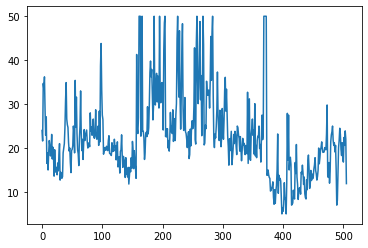

In [12]:
plt.plot( ydata )
plt.show()